<h2>引言</h2>
在进行加密货币的量化研究过程中，我遇到了一些困难。
<ol>
<li>原来的abu系统中Huobi api已经失效，而且只能获取Bitcoin和Litecoin的数据,示范策略并没有覆盖多币种</li>
<li>很多离线数据集没有包含最新的一些数据</li>
<li>市场上很多加密货币的api都需要付费，而我目前暂时没有付费获取数据的意愿</li>
</ol>
因而，我这篇研究分享主要完成如下内容。
<ol>
<li>在Qsabu中加入获取CoinMarketCap上的多币种日线数据</li>
<li>利用获取的数据进行简单策略的分析</li>
</ol>

<h2>项目地址</h2>
https://github.com/qiushui777/Qsabu

<h2>数据获取</h2>
我新增了ScraperQs文件夹，目前主要代码在QsCoinMk.py中。这里简单介绍下，具体可以去看源码。
<ul>
<li>get_all_kline_data和refresh_all_kline_data可以获取并更新前20币种的日线数据集</li>
<li>get_all_kline_data可能会被网站暂时屏蔽，所以可以等一段时间后再去用refresh_all_kline_data继续下载</li>
<li>获取到的数据以csv的格式存放在abu\data\cache中</li>
</ul>

<h2>数据可视化分析</h2>

In [2]:
# 基础库导入

from __future__ import print_function
from __future__ import division

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy

In [3]:
from abupy import QsDataMarket,ABuMarketDrawing

这里我们获取5个币种的数据进行分析。因为我写的数据获取模块可以获取20个币种，经过适当的扩展可以获取更多的币种，有兴趣的朋友可以自行摸索。

In [4]:
qsmarket = QsDataMarket()
bitcoin = qsmarket.get_coin_df(coin='bitcoin')
ethereum = qsmarket.get_coin_df(coin='ethereum')
litecoin = qsmarket.get_coin_df(coin='litecoin')
ripple = qsmarket.get_coin_df(coin='ripple')
bitcoin_cash = qsmarket.get_coin_df(coin='bitcoin-cash')

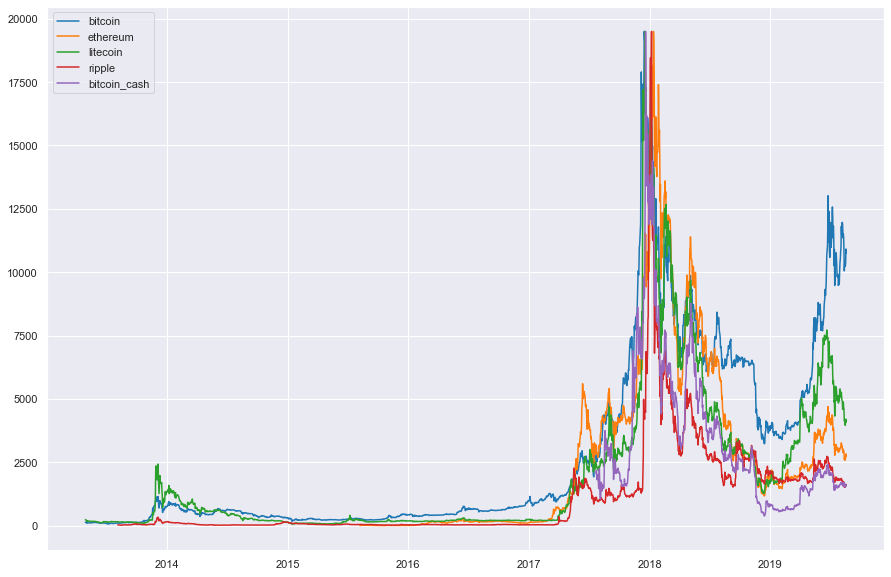

In [7]:
mpl.rcParams['figure.figsize'] = (15,10)
ABuMarketDrawing.plot_multi_df({'bitcoin':bitcoin,'ethereum':ethereum,'litecoin':litecoin,'ripple':ripple,
                                'bitcoin_cash':bitcoin_cash})